In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [2]:
data = pd.read_csv("var_5.csv", header=0, index_col=0)
print(data)
data = data.dropna()
print(data)

             0         1           2         3         4         5
0    18.666546  0.100380  113.477722       NaN  0.381134  0.159769
1    39.656294 -0.004886  113.029768       NaN -0.476240  0.169744
2    55.801868  0.152478  113.328827 -1.372649 -0.291431  0.146867
3    37.956306 -0.013714  113.041973 -2.916832  0.165505 -0.049895
4    20.051721  0.334189  113.715908 -1.774433 -0.230313  0.065794
..         ...       ...         ...       ...       ...       ...
778  28.799148  0.028804  113.061899 -1.798078  0.085598  0.056727
779  25.081215  0.402828  113.843942 -0.582576  0.346222  0.126252
780  96.931237  0.115086  112.887769 -2.356444  0.398237  0.151243
781  17.794517  0.306114  113.611179 -1.912331 -0.301193  0.097877
782  20.765449  0.127209  113.292621 -1.911856  0.269736  0.134322

[783 rows x 6 columns]
             0         1           2         3         4         5
2    55.801868  0.152478  113.328827 -1.372649 -0.291431  0.146867
3    37.956306 -0.013714  113.041973 -

Порядка 10% строк содержат пропуски в значениях, это значение относительно небольшое, поэтому удалим эти строки перед дальнейшим анализом

In [3]:
def EDA(i):
    print("====================================")
    print(f'======= Analyzing feature #{i} =======')
    print("====================================")
    
    x = data.iloc[:, i]
    print(x.describe())
    plt.boxplot(x)
    plt.title("Boxplot of values")
    plt.show()
    
    hist = plt.hist(x, density=True)
    plt.title("Histogram of values distribution")
    plt.show()
    

======= Analyzing feature #0 =======
count    699.000000
mean      37.747545
std       21.931407
min        0.018155
25%       20.245827
50%       34.956883
75%       49.563009
max       99.818429
Name: 0, dtype: float64


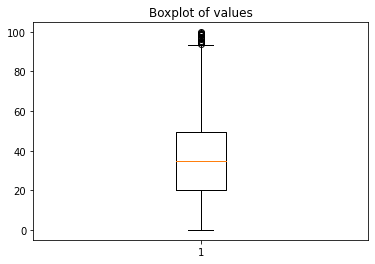

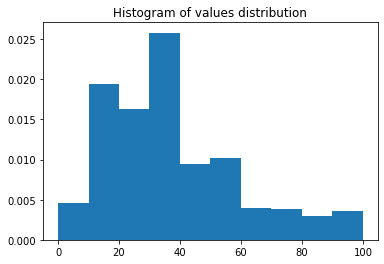

In [4]:
EDA(0)

У распределения наблюдается тяжелый хвост справа. По форме похоже на гамма распределение.

======= Analyzing feature #1 =======
count    699.000000
mean       0.224531
std        0.128660
min       -0.075932
25%        0.125969
50%        0.214042
75%        0.305798
max        0.728921
Name: 1, dtype: float64


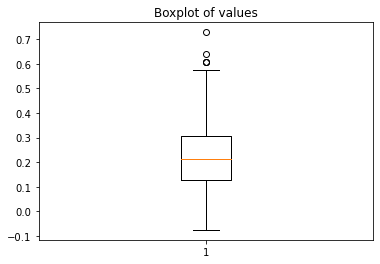

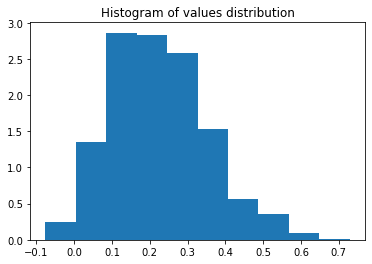

In [5]:
EDA(1)

Значения чуть смещены вправо, но в целом похоже на нормальное распределение вокруг 0.2

======= Analyzing feature #2 =======
count    699.000000
mean     113.502594
std        0.305986
min      112.740308
25%      113.289838
50%      113.484506
75%      113.693140
max      114.644767
Name: 2, dtype: float64


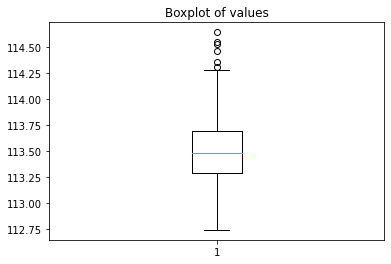

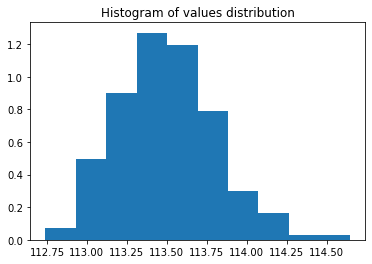

In [6]:
EDA(2)

Так же, как и в 1, есть некоторое смещение вправо, но в целом похоже на нормальное распределение вокруг 113.5

======= Analyzing feature #3 =======
count    699.000000
mean      -1.709510
std        0.885605
min       -7.585673
25%       -2.031515
50%       -1.505495
75%       -1.128934
max       -0.234208
Name: 3, dtype: float64


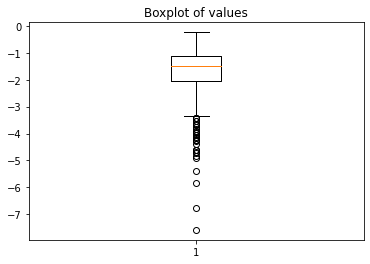

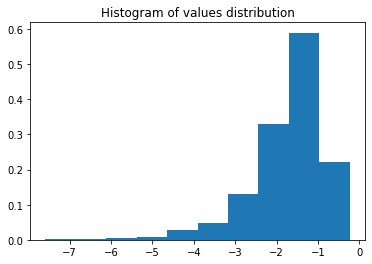

In [7]:
EDA(3)

Центр распределения смещен вправо, есть тяжелый хвост слева. Все значения отрицательные

======= Analyzing feature #4 =======
count    699.000000
mean       0.004514
std        0.289229
min       -0.498726
25%       -0.250300
50%        0.014074
75%        0.248882
max        0.498867
Name: 4, dtype: float64


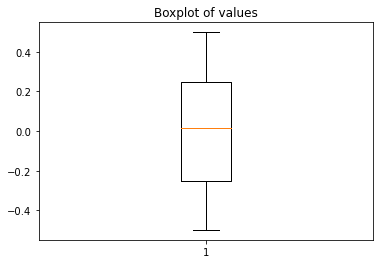

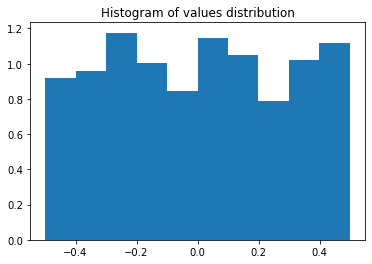

In [8]:
EDA(4)

Похоже на равномерное распределение на отрезке [-0.5, 0.5]

======= Analyzing feature #5 =======
count    699.000000
mean       0.084218
std        0.090434
min       -0.126631
25%        0.014224
50%        0.079454
75%        0.146458
max        0.330582
Name: 5, dtype: float64


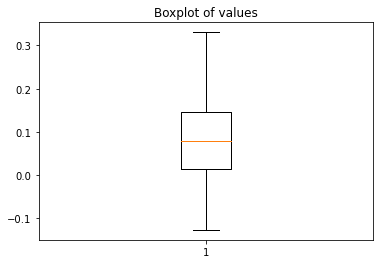

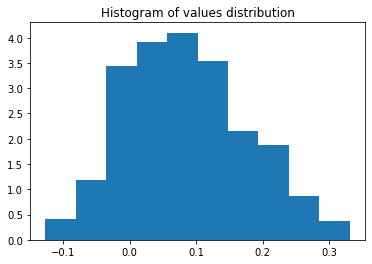

In [9]:
EDA(5)

И снова похоже на нормальное распределение вокруг 0.08 с небольшим перекосом вправо

Построим графики для всех пар наблюдаемых векторов значений, чтобы оценить есть ли между ними попарная зависимость. Также посчитаем коэффициент корреляции Пирсона, который оценивает степень линейной зависимости между двувмя парами величин. Значений +1 соответствует прямой линейной зависимости, -1 обратной линейной зависимости, 0 показывает отсутствие зависимости между величинами

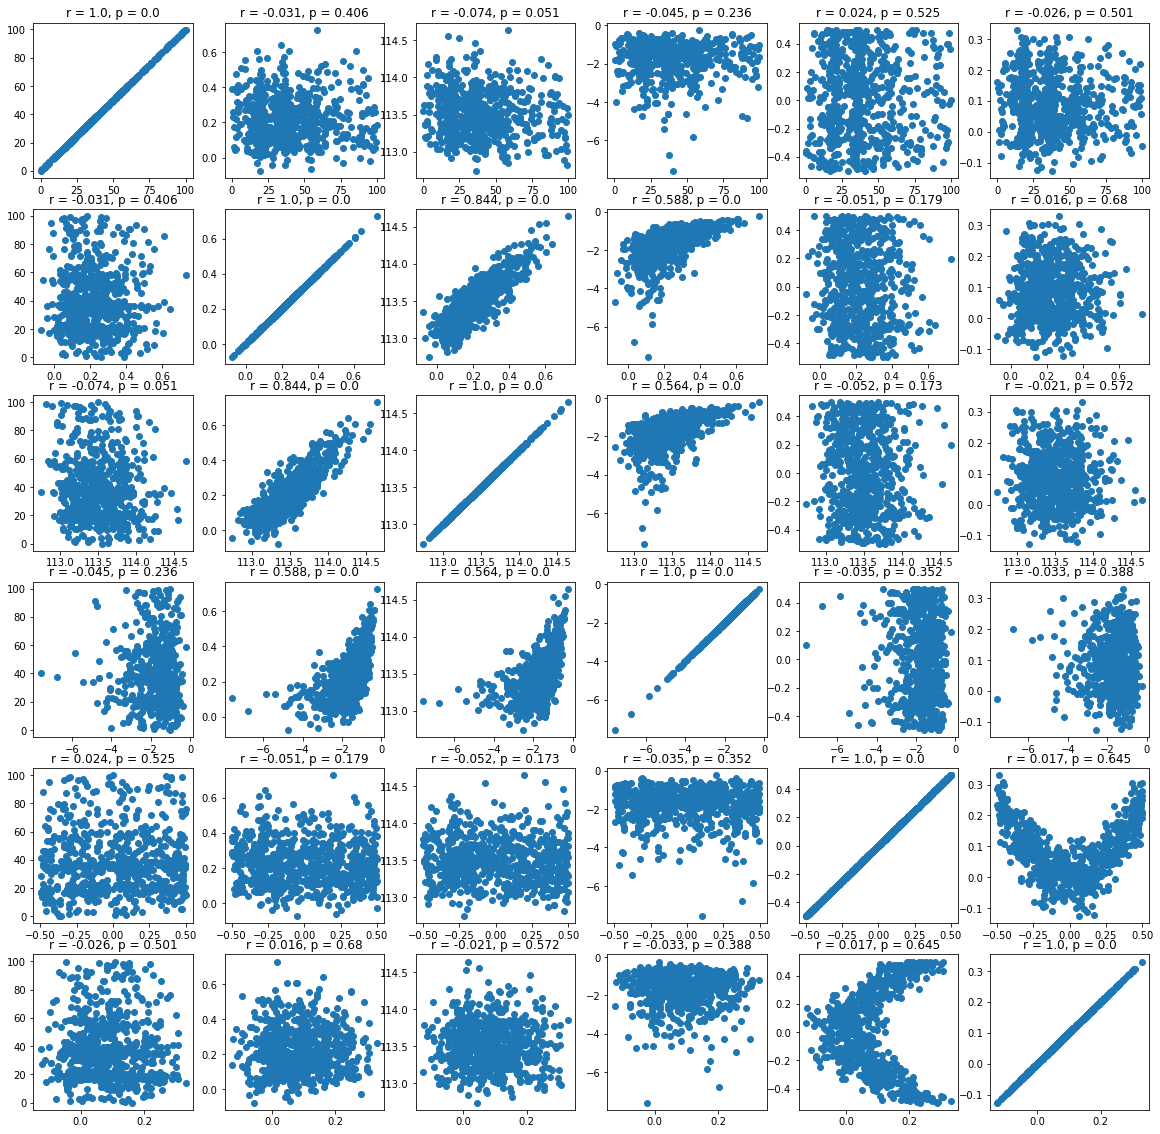

In [10]:
plt.figure(figsize=(20, 20))

for i in range(6):
    for j in range(6):
        plt.subplot(6, 6, 6*i+j+1)
        plt.scatter(data.iloc[:, i], data.iloc[:, j])
        r, p = map(lambda x: round(x, 3), scipy.stats.pearsonr(data.iloc[:, i], data.iloc[:, j]))
        plt.title(f'r = {r}, p = {p}')
plt.show()

Между первым и вторым признаком наблюдается сильная линейная зависимость (r=0.84)

### Выводы:
* В данных есть пропущенные значения, но их не слишком много, так что они не мешают дальнейшему анализу
* В данных нет явных выбросов
* Один из параметров может быть аппроксимирован равномерным распределением, остальные являются одномодальными распределениями с хвостами разной тяжести
* 1 и 2 признаки показывают явную линейную зависимость, это надо учитывать в дальнейшем анализе
